In [1]:
import sys
sys.path.append('../')
import numpy as np
from clfanalysis.predict import run_classifier_predictions

# Data

In [2]:
DataParams = {}

fileID_Igor_list_8 = ['210051', '211842']  #['215255', '222553','225544','232908', '235431']     
fileID_Igor_list_25= ['210123', '211909'] #['215322', '222709','225609','232935', '235456']
fileID_Igor_list_50= ['210159', '211939'] # ['215351','222738','225640','233005', '235527']

clf_flag = 'mlp' 
datafile_p = fileID_Igor_list_25

DataParams['N'] = 5
DataParams['prefix']  = '../expt_data/Cornelius_data_2/'
DataParams['year']  = '2018'
DataParams['date']  = '20181008'
DataParams['brightID']  = '210043'#'214921'
DataParams['darkID']  = '210005'#'214856'
DataParams['img_shape']  = (11, 33)
DataParams['cycles']  = 500 #100 
DataParams['save'] = '_pApB_25'

binary_data = []
rho_0_data = []
rho_1_data =[]
pi_data = []

# Classification Analysis

In [3]:
for ionpos in range(DataParams['N']):
    print()
    print('Ion number', ionpos + 1)
    
    pred, wpred, rho0, rho1, pi = run_classifier_predictions(ionpos, clf_flag, datafile_p, **DataParams)
    
    binary_data.append(pred)
    rho_0_data += rho0
    rho_1_data += rho1
    pi_data +=pi 
    
    np.savez(clf_flag+'_fulldata_'+DataParams['save'], 
             DataParams=DataParams, 
             binary_data=binary_data, 
             rho_0_data=rho_0_data,
             rho_1_data=rho_1_data,
             pi_data=pi_data)
    

    


Ion number 1
Request that following prediction datasets are concatenated:
['210123', '211909']
Adding file with IGOR ID:  210123
Adding file with IGOR ID:  211909


../clfanalysis/noisecorrections.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  pi = (pi_base - nu_min) / (nu_max - nu_min)
../clfanalysis/noisecorrections.py:24: RuntimeWarning: invalid value encountered in double_scalars
  rho_minus = (alpha_hat * pi_base) / (1.0 - pi)
../clfanalysis/noisecorrections.py:25: RuntimeWarning: invalid value encountered in double_scalars
  rho_plus = (beta_hat * (1.0 - pi_base)) / (pi)
../clfanalysis/noisecorrections.py:21: RuntimeWarning: invalid value encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))


Making a prediction 7 bare 0.94 0.0

Ion number 2
Request that following prediction datasets are concatenated:
['210123', '211909']
Adding file with IGOR ID:  210123
Adding file with IGOR ID:  211909
Making a prediction 1 bare 0.84 0.0


../clfanalysis/noisecorrections.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  pi = (pi_base - nu_min) / (nu_max - nu_min)
../clfanalysis/noisecorrections.py:24: RuntimeWarning: invalid value encountered in double_scalars
  rho_minus = (alpha_hat * pi_base) / (1.0 - pi)
../clfanalysis/noisecorrections.py:25: RuntimeWarning: invalid value encountered in double_scalars
  rho_plus = (beta_hat * (1.0 - pi_base)) / (pi)
../clfanalysis/noisecorrections.py:20: RuntimeWarning: invalid value encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))


Making a prediction 6 bare 0.87 0.84

Ion number 3
Request that following prediction datasets are concatenated:
['210123', '211909']
Adding file with IGOR ID:  210123
Adding file with IGOR ID:  211909
Making a prediction 2 bare 0.8 0.0
Making a prediction 4 bare 0.88 0.8
Making a prediction 5 bare 0.95 0.88

Ion number 4
Request that following prediction datasets are concatenated:
['210123', '211909']
Adding file with IGOR ID:  210123
Adding file with IGOR ID:  211909
Making a prediction 0 bare 0.87 0.0
Making a prediction 2 bare 0.92 0.87
Making a prediction 5 bare 0.95 0.92

Ion number 5
Request that following prediction datasets are concatenated:
['210123', '211909']
Adding file with IGOR ID:  210123
Adding file with IGOR ID:  211909
Making a prediction 0 bare 0.93 0.0


0.08412529850412916 0.008558655304579605 0.45419306718792796


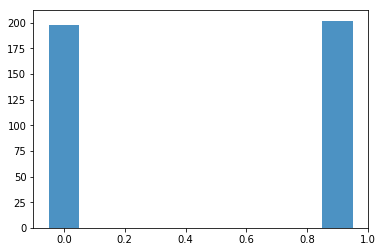

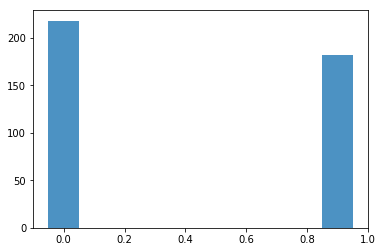

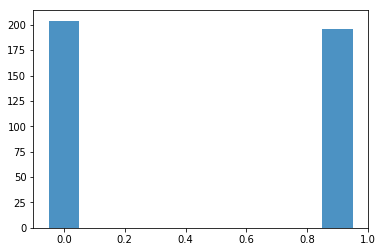

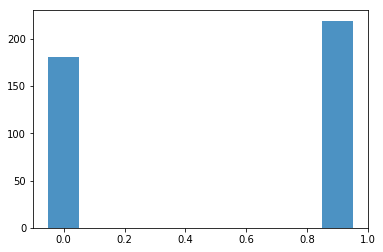

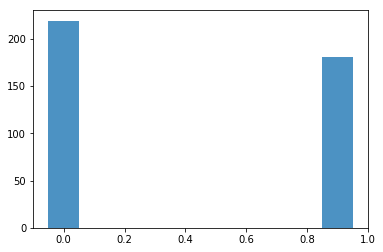

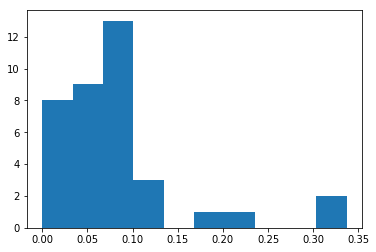

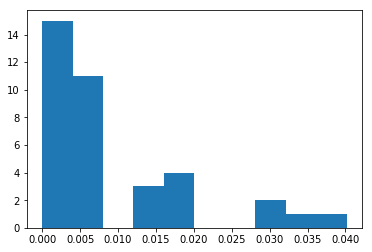

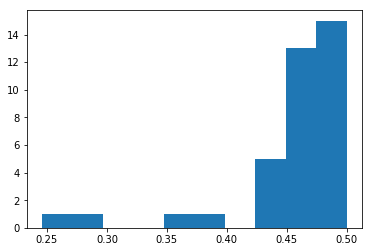

In [10]:
print(np.mean(np.asarray(rho_0_data)), np.mean(np.asarray(rho_1_data)),np.mean(np.asarray(pi_data)))


import matplotlib.pyplot as plt

for idx in range(5):
    plt.figure()
    plt.hist(binary_data[idx] - 0.05, alpha=0.8)
    plt.show()

plt.figure()
plt.hist(np.asarray(rho_0_data))
plt.show()

plt.figure()
plt.hist(np.asarray(rho_1_data))
plt.show()

plt.figure()
plt.hist(np.asarray(pi_data))
plt.show()